In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [8]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///./Resources/hawaii.sqlite")

In [9]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


In [10]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
MS = Base.classes.measurement
ST = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [14]:
# Find the most recent date in the data set.
session.query(MS.date).order_by(MS.date.desc()).first()

('2017-08-23',)

2016-08-23


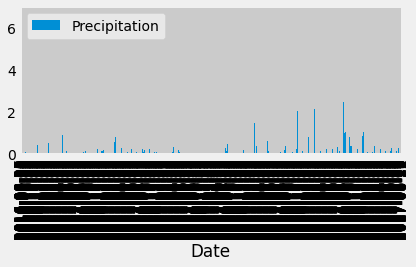

In [20]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print (year_ago)
# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores
annual_prec = session.query(MS.date, MS.prcp).filter(MS.date >= year_ago).all()
annual_prec

# Save the query results as a Pandas DataFrame and set the index to the date column

df = pd.DataFrame(annual_prec, columns=['Date', 'Precipitation'])
df.set_index('Date', inplace=True)

# Sort the dataframe by date
df.sort_values(by=['Date'])

# Use Pandas Plotting with Matplotlib to plot the data

df.plot.bar()
plt.tight_layout()
plt.show()


In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [22]:
# Design a query to calculate the total number stations in the dataset
stations = session.query(ST.station).group_by(ST.id).count()
stations

9

In [23]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(MS.station, func.count(MS.station)).group_by(MS.station).order_by(func.count(MS.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [24]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(MS.tobs), func.max(MS.tobs), func.avg(MS.tobs)).filter(MS.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

<AxesSubplot:ylabel='Frequency'>

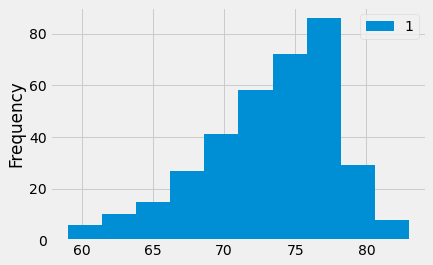

In [25]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temp_obs = session.query(MS.date, MS.tobs).filter(MS.station == 'USC00519281').filter(MS.date >= year_ago).all()

temp_obs_df = pd.DataFrame(temp_obs)
temp_obs_df.plot.hist()

# Close session

In [26]:
# Close Session
session.close()